In [1]:
import numpy as np
import pandas as pd
# from pandas import Series, DataFrame 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, validation_curve

# from xgboost import XGBClassifier
import lightgbm as ltb
# from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import joblib
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
pd.set_option('display.width', 10000)

C:\Users\makif\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df=pd.read_csv(r"C:\Users\makif\Desktop\MAAS_HESAPLAMA\d_encoded.csv")

In [3]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,LEVEL,EXPERIENCE,SALARY_AVG_TL,POSITION_CTO,POSITION_DATA SCIENTIST,POSITION_DATABASE ADMIN,POSITION_DEVOPS ENGINEER,POSITION_EMBEDDED SOFTWARE DEVELOPER,POSITION_FRONT-END DEVELOPER,POSITION_FULL STACK DEVELOPER,...,COMPANY_Startup,COMPANY_Yazılım & Teknoloji,WORK_TYPE_Geçici Remote,WORK_TYPE_Hibrit,WORK_TYPE_Ofis,WORK_TYPE_Remote,CITY_yurt_ici,CURRENCY_£ - Sterlin,CURRENCY_€ - Euro,CURRENCY_₺ - Türk Lirası
0,1,2,15499,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
1,0,0,8499,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
2,1,1,15499,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,0,1,10499,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
4,0,0,5499,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(5026, 34)
##################### Types #####################
LEVEL                                      int64
EXPERIENCE                                 int64
SALARY_AVG_TL                              int64
POSITION_CTO                               int64
POSITION_DATA SCIENTIST                    int64
POSITION_DATABASE ADMIN                    int64
POSITION_DEVOPS ENGINEER                   int64
POSITION_EMBEDDED SOFTWARE DEVELOPER       int64
POSITION_FRONT-END DEVELOPER               int64
POSITION_FULL STACK DEVELOPER              int64
POSITION_GAME DEVELOPER                    int64
POSITION_MOBILE APPLICATION DEVELOPER      int64
POSITION_OTHERS                            int64
POSITION_QA / TEST AUTOMATION DEVELOPER    int64
POSITION_SOFTWARE ARCHITECT                int64
POSITION_SOFTWARE DEVELOPMENT MANAGER      int64
POSITION_TEAM / TECH LEAD                  int64
GENDER_Kadın                               int64
COMPANY

In [5]:
#MODEL KURMA

In [6]:
#Bagımlı ve bagımsız degiskenlerimizi ayırıyoruz
y = df["SALARY_AVG_TL"]
X = df.drop(["SALARY_AVG_TL"], axis=1)

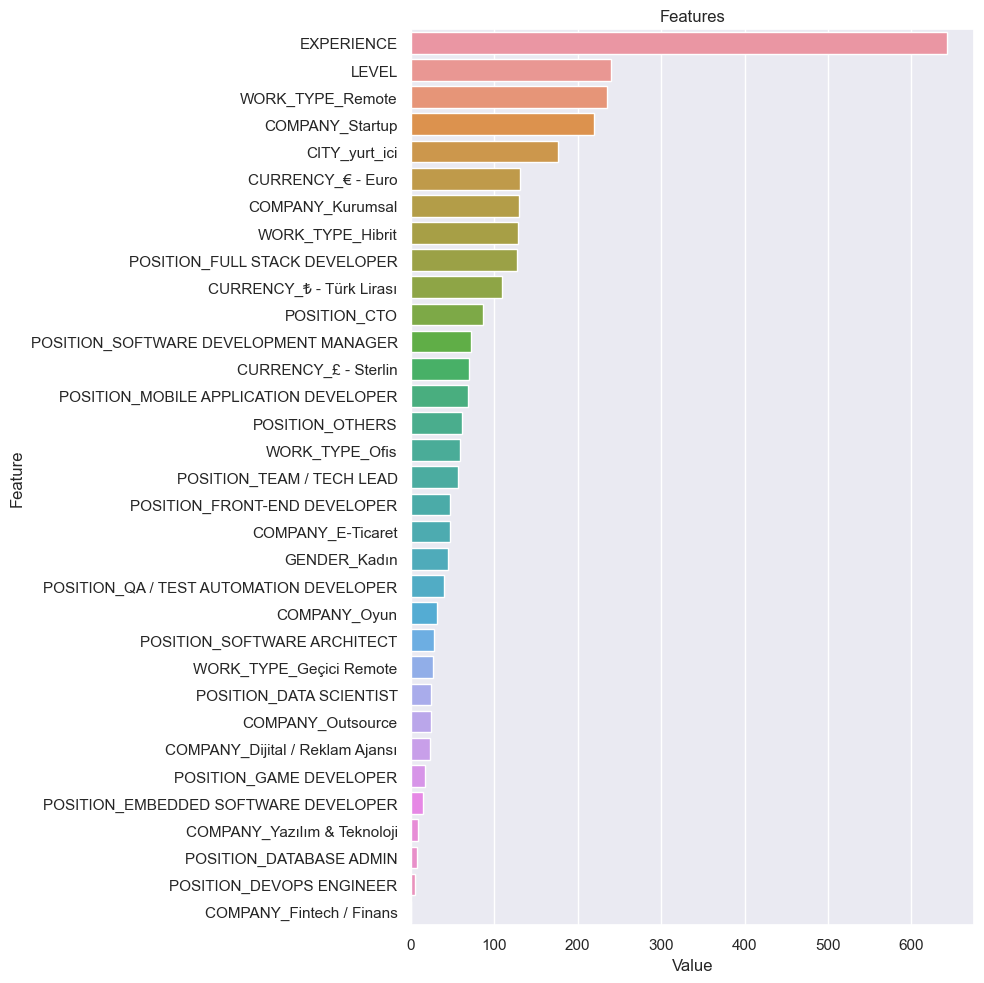

In [7]:
# Degiskenlerin önem düzeyini belirten feature importance
def plot_importance(model, features, num=len(X), save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

model = LGBMRegressor()
model.fit(X, y)

plot_importance(model, X)

In [8]:
## Train verisi ile model kurup, model başarısını değerlendirelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [9]:
#MODELRMSE DEGERLERİNE BAKALIM
models = [('LR', LinearRegression()),
          #("Ridge", Ridge()),
          #("Lasso", Lasso()),
          #("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]
          # ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 17423.4942 (LR) 
RMSE: 21687.146 (KNN) 
RMSE: 22346.7624 (CART) 
RMSE: 18354.7226 (RF) 
RMSE: 17817.1605 (GBM) 
RMSE: 19923.4895 (XGBoost) 
RMSE: 18168.7534 (LightGBM) 


In [10]:
df['SALARY_AVG_TL'].mean()

24195.556307202547

In [11]:
df['SALARY_AVG_TL'].std()

29521.804669966416

In [12]:
#veriler carpık oldugu icin log dönüşümü yapmamız gerekiyor

In [13]:
# Log dönüşümünün gerçekleştirilmesi
train_df = df[df['SALARY_AVG_TL'].notnull()]
test_df = df[df['SALARY_AVG_TL'].isnull()]

In [14]:
y = np.log1p(train_df['SALARY_AVG_TL'])
X = train_df.drop("SALARY_AVG_TL", axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)


In [16]:
lgbm = LGBMRegressor().fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

y_pred

array([ 9.12947489,  8.90651365, 10.53786385, ...,  8.94209147,
        8.98921919,  9.01513933])

In [17]:
# Yapılan LOG dönüşümünün tersinin (inverse'nin) alınması
new_y = np.expm1(y_pred)
new_y

array([ 9222.17749427,  7378.88735448, 37715.91127094, ...,
        7646.17416338,  8015.19530822,  8225.6925113 ])

In [18]:
new_y_test = np.expm1(y_test)
new_y_test

1343      7499.0
2952      5499.0
184      25499.0
1465     14499.0
1314    121085.0
          ...   
2440      5499.0
2137     10499.0
2326      5499.0
4086      8499.0
695       9499.0
Name: SALARY_AVG_TL, Length: 1006, dtype: float64

In [19]:
np.sqrt(mean_squared_error(new_y_test, new_y))

20022.4876351738

In [20]:
#LGBMRegressor Modelini Kuralım ve 
# hiperparametre optimizasyonlarını gerçekleştirelim

In [21]:
lgbm_model = LGBMRegressor()

In [22]:
rmse = np.mean(np.sqrt(-cross_val_score(lgbm_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))

In [23]:
rmse

0.36648863205370297

In [24]:
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500, 1500]
               #"colsample_bytree": [0.5, 0.7, 1]
             }

In [25]:
lgbm_gs_best = GridSearchCV(lgbm_model,
                            lgbm_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=True).fit(X, y)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [37]:
lgbm_gs_best

GridSearchCV(cv=5,
             estimator=LGBMRegressor(learning_rate=0.01, n_estimators=500),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [500, 1500]},
             verbose=True)

In [27]:
#final modelde en iyi parametreleri kullanıp fit ediyoruz
final_model = lgbm_model.set_params(**lgbm_gs_best.best_params_).fit(X_train, y_train)


In [28]:
rmse = np.mean(np.sqrt(-cross_val_score(final_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))

In [29]:
rmse

0.3642692534881872

In [30]:
#bütün df teki tahminler
predictions = final_model.predict(df.drop("SALARY_AVG_TL", axis=1))
predictions

array([9.60858196, 8.92175315, 9.48437867, ..., 8.99784901, 9.86241891,
       9.04791081])

In [31]:
predictions.shape

(5026,)

In [32]:
#MODELİ TRAİN'DE EGİTİP TEST'TEKİ TAHMİNLERİ BULALIM GRAFİK CİZMEK İCİN
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
y_pred

array([ 9.13361721,  8.97595575, 10.48393188, ...,  8.91749889,
        8.99629834,  9.02587089])

In [33]:
y_test

1343     8.922658
2952     8.612503
184     10.146434
1465     9.581904
1314    11.704256
          ...    
2440     8.612503
2137     9.259131
2326     8.612503
4086     9.047821
695      9.159047
Name: SALARY_AVG_TL, Length: 1006, dtype: float64

In [34]:
final_model.score(X_test, y_test)

0.7465038936941666

In [35]:
r2_score(y_test, y_pred)

0.7465038936941666

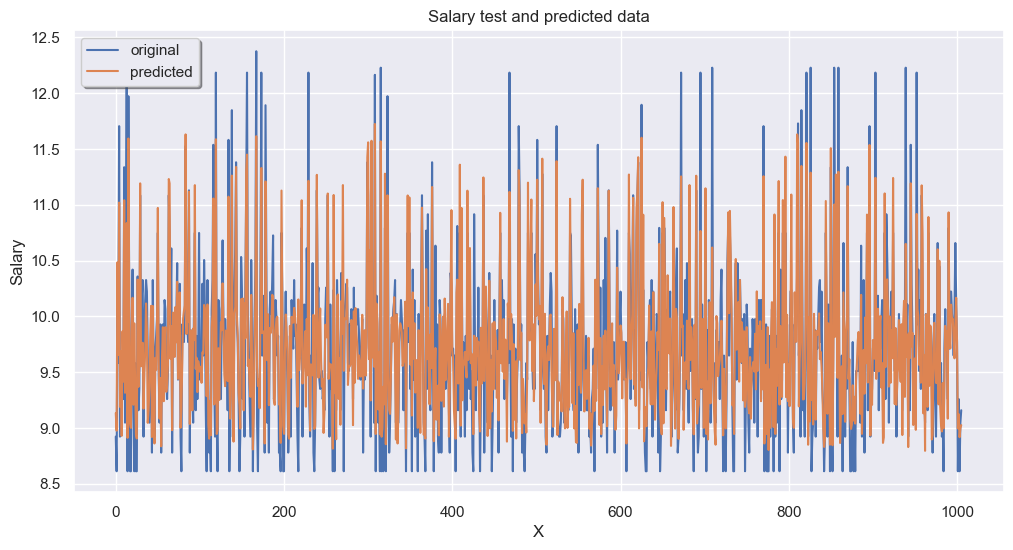

In [36]:
#BU GRAFİKTE Y_TEST'TEKİ DEGERLER VE BUNLARIN TAHMİNLERİ VAR
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Salary test and predicted data")
plt.xlabel('X')
plt.ylabel('Salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 